In [1]:
from graph import *
import utils
import preprocessing as pp

In [2]:
X, y = utils.load_data()

classes = {
    'Fake': 'blue',
    'Real': 'orange'
}

### Apply PCA and LDA to the project data.

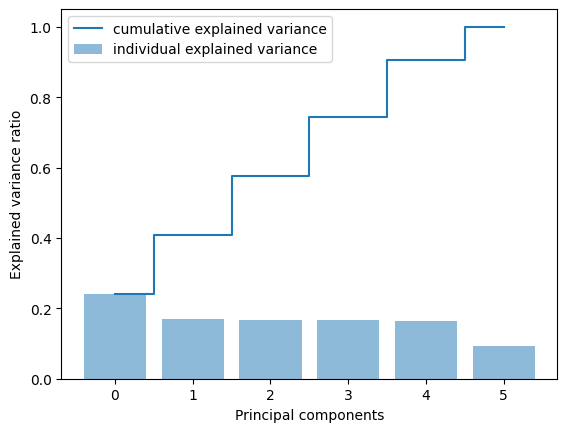

In [3]:
plot_pca_explained_variance(X)

#### Explainded variance for PCA 
- Individual Explained Variance: The height of the bars represents the variance explained by each principal component. The first few components capture more variance than the later ones, which is typical in PCA. Each bar's height indicates the proportion of the dataset's total variability captured by that specific component.

- Cumulative Explained Variance: The line shows the cumulative sum of the explained variances. This is crucial for determining how many principal components are needed to capture a substantial amount of information from the data.
  - The first principal component captures the most variance, with each subsequent component capturing progressively less. The first component alone accounts for approximately 20% of the variance.
  - By the time you reach the fifth component, the cumulative explained variance approaches nearly 80% of the total variance. This suggests that the first five components capture most of the important information in the dataset.

Based on the cumulative explained variance, using the first five components as new features could be sufficient for most predictive modeling tasks, as they retain most of the information in the original dataset.


### Apply PCA to the dataset with 6 components

In [4]:
X_pca = pp.pca(data=X, n_features=6)

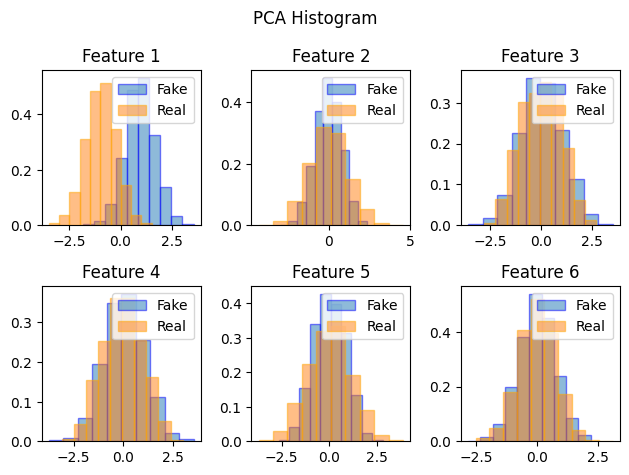

In [5]:
plot_histogram(X_pca, y, classes, title='PCA Histogram')

#### Analyze the first two components of PCA

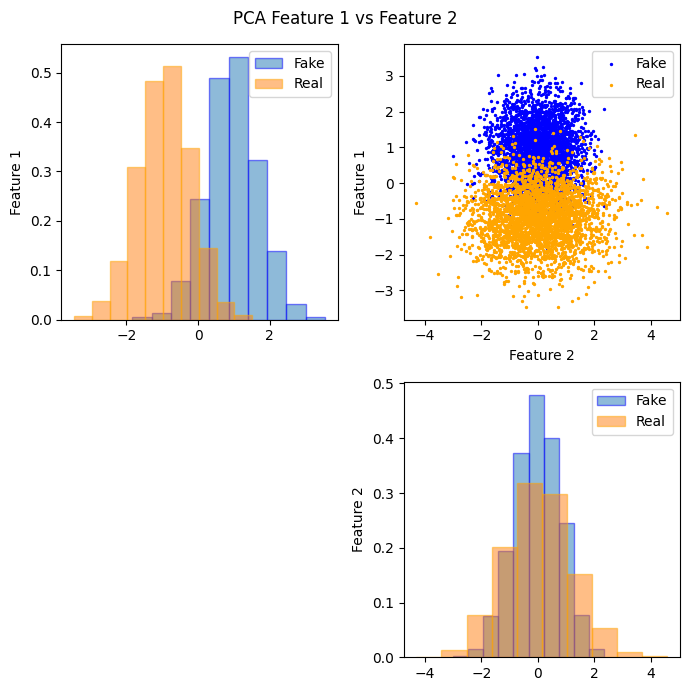

In [6]:
X_pca_f12 = X_pca[:2, :]
plot_scatter(X_pca_f12, y, classes, title='PCA Feature 1 vs Feature 2', features=[1, 2])

#### Analyze the second and third components of PCA

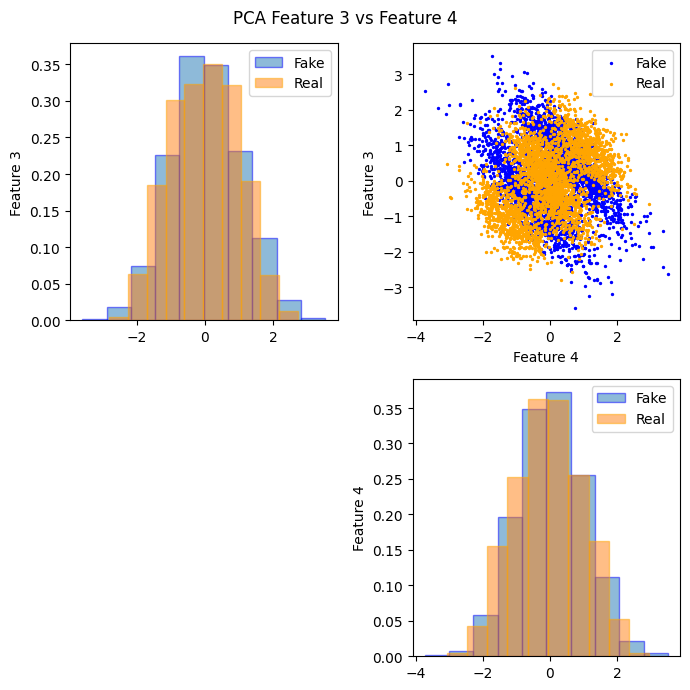

In [7]:
X_pca_f34 = X_pca[2:4, :]
plot_scatter(X_pca_f34, y, classes, title='PCA Feature 3 vs Feature 4', features=[3, 4])

#### Analyze the last two components of PCA

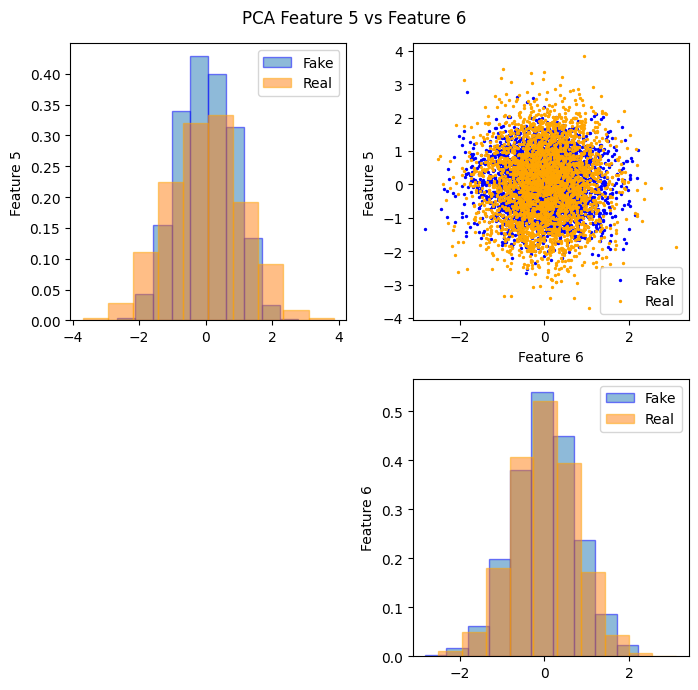

In [8]:
X_pca_f56 = X_pca[4:6, :]
plot_scatter(X_pca_f56, y, classes, title='PCA Feature 5 vs Feature 6', features=[5, 6])

### Apply LDA to the dataset

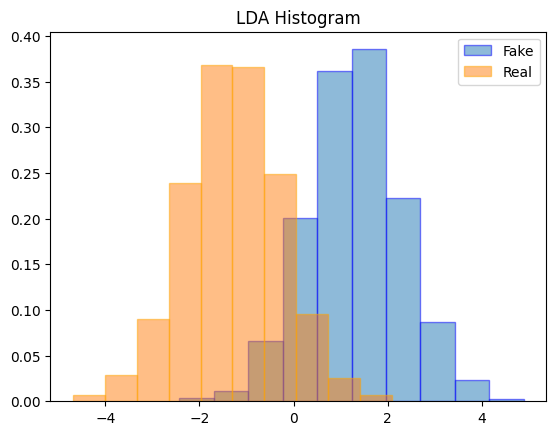

In [9]:
plot_lda_histogram(X, y, classes, title='LDA Histogram')

#### Apply LDA as a classifier

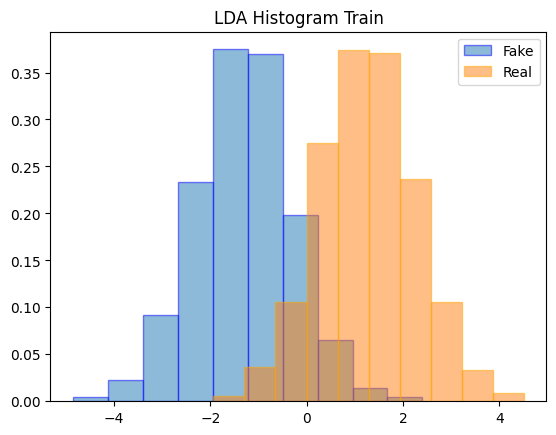

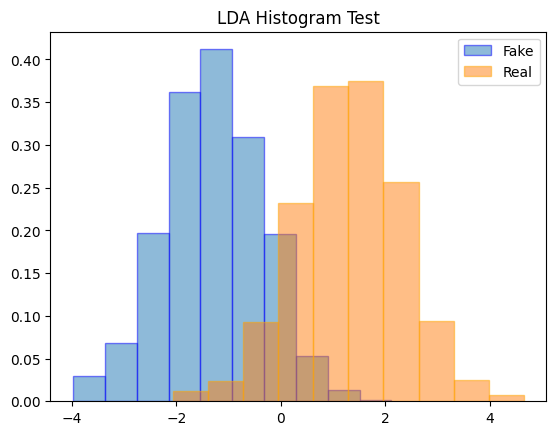

In [10]:
X_train, y_train, X_test, y_test = utils.split_data(X, y)
X_train_lda, eigen_vector = pp.lda(data=X_train, label=y_train, n_features=1, required_eigen_vectors=True)
X_test_lda = np.dot(eigen_vector.T, X_test)

plot_histogram(X_train_lda, y_train, classes, title='LDA Histogram Train')
plot_histogram(X_test_lda, y_test, classes, title='LDA Histogram Test')

In [11]:
threshold = (X_train_lda[0, y_train == 1].mean() + X_train_lda[0, y_train == 0].mean()) / 2

y_pred = np.zeros(shape=y_test.shape, dtype=np.int32)
y_pred = np.where(X_test_lda[0] >= threshold, 1, 0)

print(f'LDA Accuracy: {(np.mean(y_pred == y_test))*100:.2f}% (threshold: {threshold:.2f})')

LDA Accuracy: 90.70% (threshold: -0.02)


#### Change the threshold of the classifier

In [16]:
thresholds = np.linspace(-10, 10, 1000)
accuracy = 0


for i, threshold in enumerate(thresholds):
    y_pred = np.where(X_test_lda[0] >= threshold, 1, 0)
    acc = np.mean(y_pred == y_test)
    if i % 100 == 0:
        print(f"Accuracy: {acc*100:.2f}% with threshold: {threshold:.2f}")
    if acc > accuracy:
        accuracy = acc
        best_threshold = threshold

print(f'Best accuracy: {accuracy*100:.2f}% with threshold: {best_threshold:.2f}')

Accuracy: 50.40% with threshold: -10.00
Accuracy: 50.40% with threshold: -8.00
Accuracy: 50.40% with threshold: -6.00
Accuracy: 50.50% with threshold: -3.99
Accuracy: 61.00% with threshold: -1.99
Accuracy: 91.10% with threshold: 0.01
Accuracy: 61.60% with threshold: 2.01
Accuracy: 49.85% with threshold: 4.01
Accuracy: 49.60% with threshold: 6.02
Accuracy: 49.60% with threshold: 8.02
Best accuracy: 91.10% with threshold: 0.01


### Preprocess the data with PCA (with different number of components) and classify the data with LDA

In [13]:
for i in reversed(range(X_train.shape[0])):
    X_train_pca, eigen_vector = pp.pca(data=X_train, n_features=i+1, required_eigen_vectors=True)
    X_test_pca = np.dot(eigen_vector.T, X_test)
    
    X_train_lda, eigen_vector = pp.lda(data=X_train_pca, label=y_train, n_features=1, required_eigen_vectors=True)
    X_test_lda = np.dot(eigen_vector.T, X_test_pca)
    
    threshold = (X_train_lda[0, y_train == 1].mean() + X_train_lda[0, y_train == 0].mean()) / 2
    y_pred = np.zeros(shape=y_test.shape, dtype=np.int32)
    y_pred = np.where(X_test_lda[0] >= threshold, 1, 0)
    
    accuracy = np.mean(y_pred == y_test)
    print(f'PCA Accuracy with {i+1} features and LDA: {(accuracy)*100:.2f}%')

PCA Accuracy with 6 features and LDA: 90.70%
PCA Accuracy with 5 features and LDA: 90.70%
PCA Accuracy with 4 features and LDA: 90.75%
PCA Accuracy with 3 features and LDA: 90.75%
PCA Accuracy with 2 features and LDA: 9.25%
PCA Accuracy with 1 features and LDA: 90.65%
